# Unsupervised Learning and K-Means Clustering
**Unsupervised Learning**, commonly referred to as as unsupervised machine learning, uses machine learning algorithms to inspect and cluster datasets without labels. The goal of these algorithms is to discover hidden paths or data grouping without the need for human intervention. It harnesses the ability to discover similarities and differences in data make it the prefered method for exploratory data analysis.

**Issues with Unsupervised Learning:**
- Unsupervised Learning is harder as compared to Supervised Learning tasks. 
- How do we know if results are meaningful since no anser labels are provided?
- Let the expert look at the results (external evaluation)
- Define an objective funtion on clustering (interval evaluation)

#### What is Clustering?

Clustering is a data mining technique which can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data. A loose definition of clustering could be " the process of organizing object into groups whose members are similar in some way." A cluster is therefor a collection of objects whichare "similar" between them and are "dissimilar" to the objects belonging to other clusters. 

#### K-Means Clustering

K-means clustering is a common example of an exclusive clustering method where data points are assigned into K groups, where K represents the number of clusters based on the distance from each group’s centroid. The data points closest to a given centroid will be clustered under the same category. A larger K value will be indicative of smaller groupings with more granularity whereas a smaller K value will have larger groupings and less granularity. 

#### The objective function is:

$$ J = \sum_{i=1}^m \sum_{k=1}^K w_{ik}||x^i - u_k||^2 $$

For this notebook we will need the following packages:
- Statistics [documentation](https://docs.julialang.org/en/v1/stdlib/Statistics/)
- Plots [documentation](https://docs.juliaplots.org/latest/) 

In [1]:
#Using Package
using Statistics
using Plots

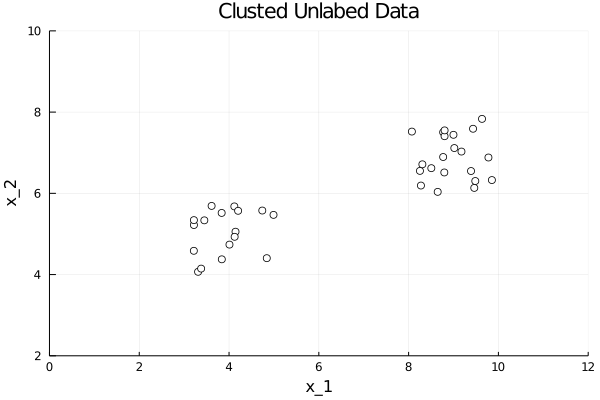

In [4]:
# generating random data
function circleShape(h,k,r)
    θ = LinRange(0,2*π, 500)
    return h.+r*sin.(θ), k.+ r*cos.(θ)
    end 

cluster1 = [(4 + (-1)^rand(1:2)*rand(), 5 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:17]

cluster2 = [(9 + (-1)^rand(1:2)*rand(), 7 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:21]


data = copy(cluster1)
for x in cluster2
    push!(data,x)
end

plot(legend = false, 
xlabel = "x_1", 
xlim = (0,12), 
ylabel = "x_2",
ylim = (2,10),
title = "Clusted Unlabed Data")

scatter!(data,color = "white")

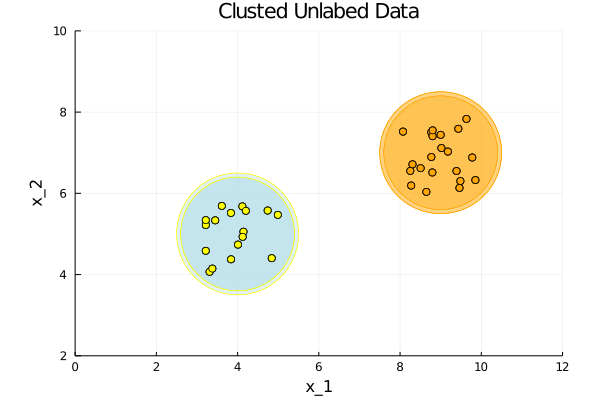

In [9]:
plot!(circleShape(4, 5, 1.4),
        seriestype = [:shape,],
        lw=0.5,
        c="lightblue",
        legend=false,
        linecolor="yellow",
        fillalpha=0.2,
        aspect_ratio=1)

plot!(circleShape(9, 7, 1.4),
        seriestype = [:shape,],
        lw=0.5,
        c="orange",
        legend=false,
        linecolor="orange",
        fillalpha=0.2,
        aspect_ratio=1)

scatter!(cluster1,color = "yellow")
scatter!(cluster2,color = "orange")

#### The Euclidean Distance Formual:

$$ d(p,q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + ... + (p_n - q_n)^2} $$

$$ d(p,q) = \sum_{i=1}^{n} (q_i - p_i)^2  $$

- We use the euclidean distance formual to find the space between points and classify them based on their distance from the point and centroids. 

In [10]:
function euclidean_distance(p1,p2)
    return sqrt(sum([(p1[i]-p2[i])^2 for i =1:length(p1)]))
end

euclidean_distance (generic function with 1 method)

In [11]:
function k_means_distance(X, centroids, k)
    distances = Dict()
    for p in X
        temp_dict = Dict()
        for i = 1:k
            temp_dict[i] = euclidean_distance(p, centroids[i])
        end
        distances[p] = temp_dict
    end
    return distances
end

k_means_distance (generic function with 1 method)

In [12]:
function k_mean_clusters(X, centroids , k)
    distances = k_means_distance(X, centroids , k)
    clusters = Dict()
    for p in X
        clusters[p] = 1
        min_d = distances[p][1]
        for i = 2:k
            if distances[p][i] < min_d
                clusters[p] = i
                min_d = distances[p][i]
                end 
            end 
        end 
    return clusters
end

k_mean_clusters (generic function with 1 method)

In [13]:
function k_mean_new_centroids(X,centroids, k)
    clusters = k_mean_clusters(X,centroids,k)
    new_centers = []
    for j = 1:k
        x = mean([p[1] for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2] for p in keys(clusters) if clusters[p] == j])
        point = (x,y)
        push!(new_centers, point)
        end 
    return new_centers
end

k_mean_new_centroids (generic function with 1 method)

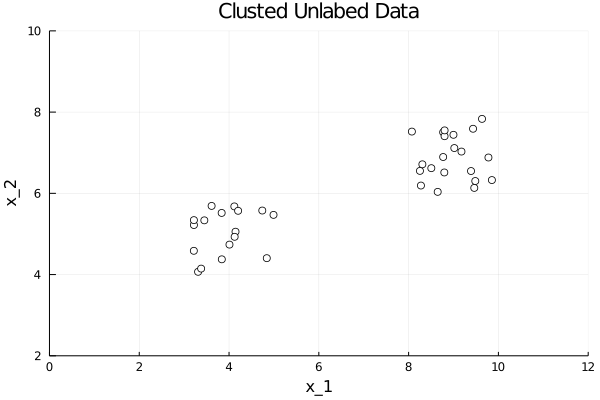

In [15]:
plot(legend = false, 
xlabel = "x_1", 
xlim = (0,12), 
ylabel = "x_2",
ylim = (2,10),
title = "Clusted Unlabed Data")

scatter!(data,color = "white")

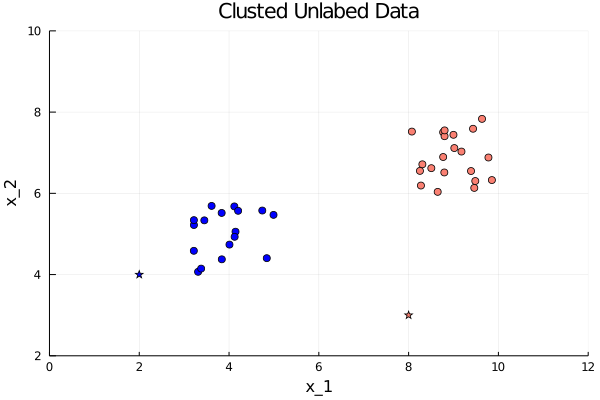

In [17]:
#create random new center points
initial_centers = [(rand(1:10),rand(1:10)),(rand(1:10),rand(1:10))]
#Classify points in these random new clusters
clusters = k_mean_clusters(data, initial_centers,2)

#Plot the data with the clusters with classification colors. 
plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "Clusted Unlabed Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([initial_centers[1]], color = "salmon", shape = :star5)
scatter!([initial_centers[2]], color = "blue", shape = :star5)

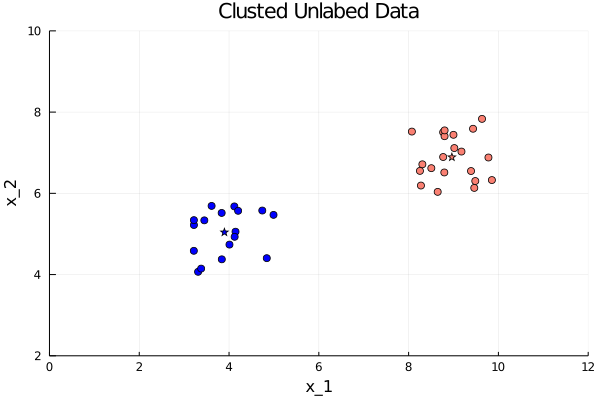

In [20]:
centroids_test1 = k_mean_new_centroids(data, initial_centers, 2)

clusters = k_mean_clusters(data,centroids_test1, 2)

plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "Clusted Unlabed Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test1[1]], color = "salmon", shape = :star5)
scatter!([centroids_test1[2]], color = "blue", shape = :star5)

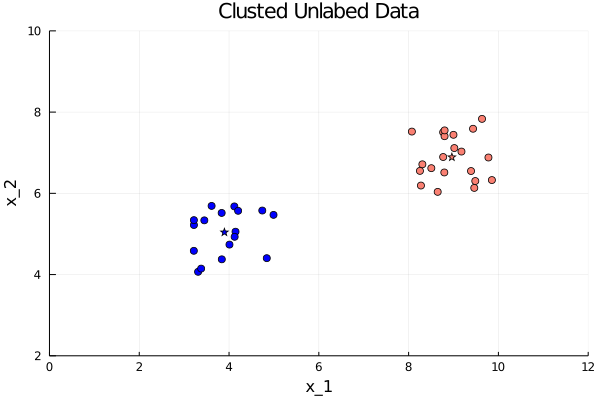

In [21]:
centroids_test2 = k_mean_new_centroids(data, centroids_test1, 2)

clusters = k_mean_clusters(data,centroids_test2, 2)

plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "Clusted Unlabed Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test2[1]], color = "salmon", shape = :star5)
scatter!([centroids_test2[2]], color = "blue", shape = :star5)

#### Conclusion:

- The goal of K-means is to group data points into distinct non-overlapping subgroups. It is a extensively used technique for data cluster analysis. A thing to mention is it does a good job when the clusters have a spherical shape, but when the geometry changes to a different shape it could be less reliable. Another limitation is that we need to have a pre-defined number of clusters as it doesn't learn the number. Yet, on the bright side it is easy to learn and implement. 